In [9]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define paths to train and test directories
TRAIN_DIR = '/content/drive/My Drive/gem_stones/train/'
TEST_DIR = '/content/drive/My Drive/gem_stones/test/'

In [5]:
# Data Augmentation for the training set and rescaling for both train and test sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set to avoid overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No augmentation for the test set, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load images from train and test folders
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Validation for test set
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 2856 images belonging to 87 classes.
Found 363 images belonging to 87 classes.
Found 0 images belonging to 87 classes.


In [10]:
# Create the convlution base
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,776 (77.25 KB)

 Trainable params: 19,584 (76.50 KB)

 Non-trainable params: 192 (768.00 B)

In [12]:
# Add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(87, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 87)                  │           5,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,333,911 (20.35 MB)

 Trainable params: 5,333,719 (20.35 MB)

 Non-trainable params: 192 (768.00 B)

In [14]:
# Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Model training using test_generator for validation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,  # Using test set for validation
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=25)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 1557s 16s/step - accuracy: 0.0136 - loss: 8.2773 - val_accuracy: 0.0369 - val_loss: 6.7183
Epoch 2/25
 1/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0000e+00 - loss: 4.6877

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.0000e+00 - loss: 4.6877 - val_accuracy: 0.0000e+00 - val_loss: 5.9987
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 295ms/step - accuracy: 0.0242 - loss: 4.7643 - val_accuracy: 0.0142 - val_loss: 8.1168
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 8.2364 - val_accuracy: 0.0000e+00 - val_loss: 10.5768
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.0214 - loss: 4.9093 - val_accuracy: 0.0312 - val_loss: 7.9388
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 4.4681 - val_accuracy: 0.0000e+00 - val_loss: 9.8564
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 299ms/step - accuracy: 0.0307 - loss: 4.5248 - val_accuracy: 0.0199 - val_loss: 4.7331
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.0000e+00 - loss: 4.5396 - val_accuracy: 0.0909 - val_loss: 5.1071
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.0219 - loss: 4.5950

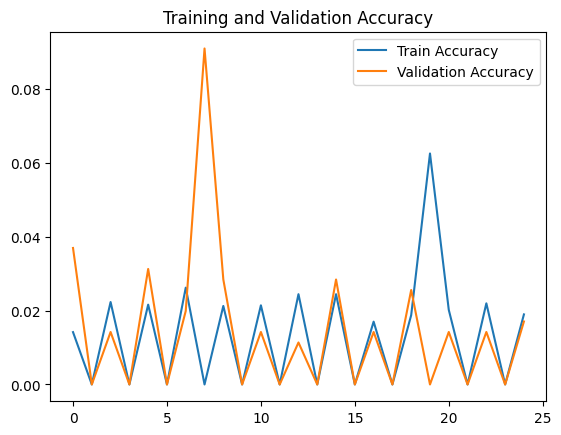

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

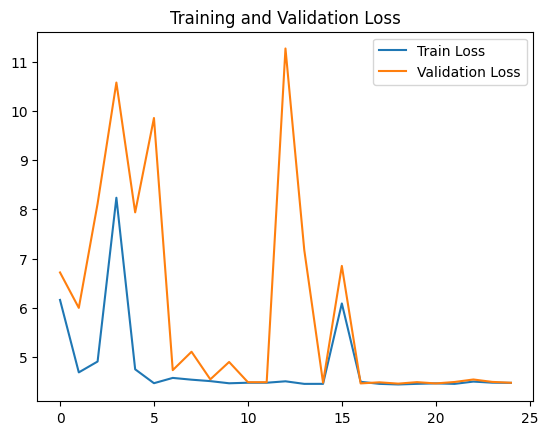

In [17]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.0317 - loss: 4.4639
Test Loss: 4.498462677001953
Test Accuracy: 0.01652892492711544
